<a href="https://colab.research.google.com/github/P-Shiva/Transport-Demand-Prediction/blob/main/Shiva_Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description

We are a group of 5 people (Ashutosh Kumar Singh, Roja Rahman, Shiva Nagender, Simran Kumari and Vinay Kiran) from Cohort Durban. This challenge asks to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.

### The towns from which these routes originate are:

* Awendo 
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

## The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped here.

Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events and holidays.



# Project Type - Regression
##Contribution - Team
* Team Member 1 - Ashutosh Kumar Singh
* Team Member 2 - Roja Rahman
* Team Member 3 - Shiva Nagender
* Team Member 4 - Simran Kumari
* Team Member 5 - Vinay Kiran



### Github Link: 
https://github.com/P-Shiva/Transport-Demand-Prediction/blob/main/Shiva_Transport_Demand_Prediction.ipynb

# Data Description

Nairobi Transport Data.csv (zipped) is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.

Uber Movement traffic data can be accessed here. Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* seat_number: seat assigned to ticket
payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* payment_receipt: unique id number for ticket purchased from Mobiticket
travel_date: date of ride departure. (MM/DD/YYYY)
* travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* travel_from: town from which ride originated
* travel_to: destination of ride. All rides are to Nairobi.
* car_type: vehicle type (shuttle or bus)
* max_capacity: number of seats on the vehicle

# Let's Begin!

In [112]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Essential Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [114]:
dataset = pd.read_csv('/content/drive/MyDrive/Nairobi Transport Data.zip')

In [115]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [116]:
dataset.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


# Understanding Data

In [117]:
dataset.shape

(51645, 10)

There are 51645 Rows and 10 Columns in the dataset.

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [119]:
dataset.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


# Summary:- 

* There are total 61 unique seats in this dataset

* Travelers have used 2 types of payment method and most of the people have used Mpesa to pay for their ticket.

* The record of 149 days out of 2 year is present in this dataset.

* There are 2 different types of car and most of them are bus.

In [120]:
dataset.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

We don't see any null values in the dataset now.

so let us explore the dataset more.

In [121]:
len(dataset['ride_id'].unique())

6249

We see there are 6249 unique ride_id.

In [122]:
column = dataset.columns

In [123]:
column

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [124]:
df = dataset.copy()

# Exploratory Data Analysis

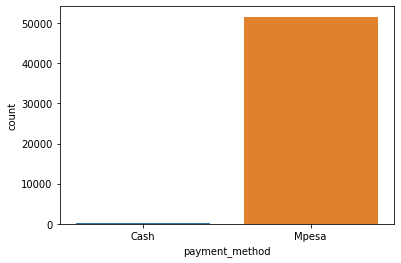

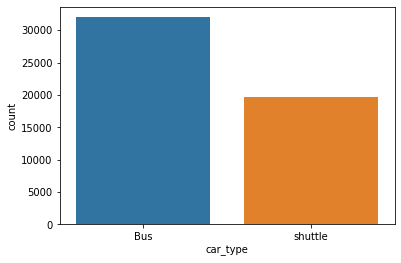

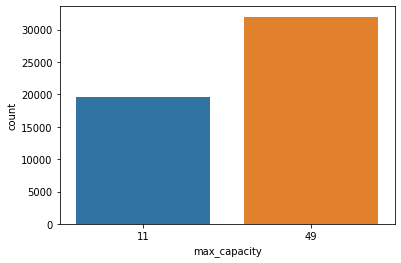

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_count_cols = ['payment_method', 'car_type', 'max_capacity']
for plot in plot_count_cols:
    sns.countplot(data=df.astype({plot: 'category'}), x=plot)
    plt.show()


# Summary 
* There are two types of methods, people used to buy tickets
* There are two types of cars BUS and SHUTTLE and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers.

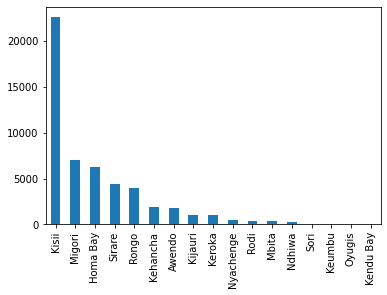

In [126]:
dataset['travel_from'].value_counts().plot(kind= 'bar')
plt.show()

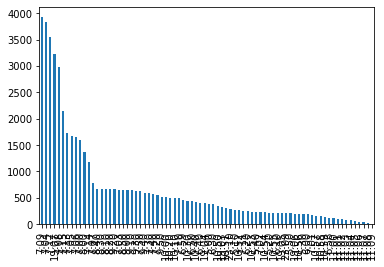

In [127]:
dataset['travel_time'].value_counts().plot(kind= 'bar')
plt.show()

# Finding Target Variables
* Since we are not given the target variables. so, we need dto find target variable first.
* There might be many ways of finding the target variable but I am using one way that is, I will find the count of each ride_id and that will be number_of_ticket as our target variable.

In [128]:
label = dataset.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


* We are grouping the dataset by ride_id and then counting the number of occurrences of seat_number for each unique ride_id. Then renaming the resulting column to "number_of_ticket" and resets the index. Finally, it returns the first 5 rows of the resulting dataframe using the head() function.

* The resulting dataframe has two columns: ride_id and number_of_ticket. Each row represents a unique ride_id and the number of tickets sold for that ride.

### Now we found our target variables so let us delete the duplicate values from ride_id

In [129]:
dataset= dataset.drop_duplicates("ride_id")

In [130]:
dataset.shape

(6249, 10)

### Now let us merge two datasets on ride_id key to make the final dataset where we have dependent as well as independent variables too.

In [131]:
dataset= dataset.merge(label, how="left", on="ride_id")
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


#### Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [132]:
dataset = dataset.drop(['seat_number', 'payment_method', 'payment_receipt'], axis= 1 )

# Removing Constant Features

We need to first remove the constant features.

In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
dataset.drop(["travel_to"], axis= 1, inplace= True)

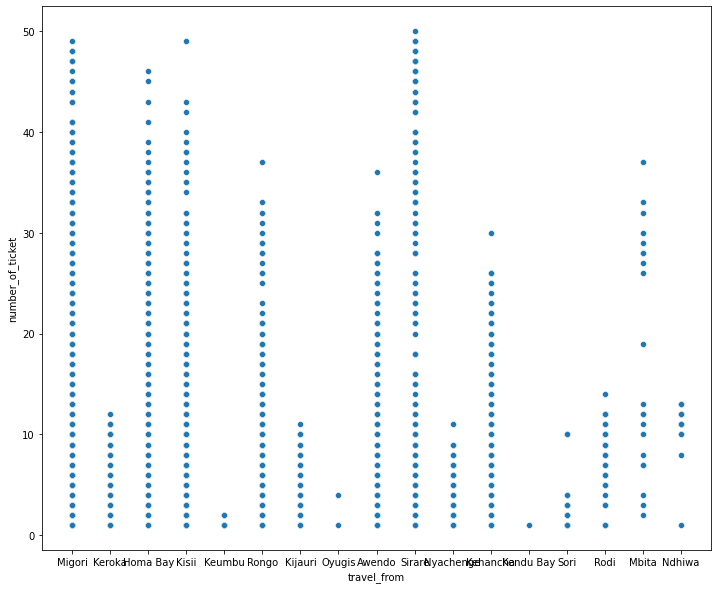

In [135]:
plt.figure(figsize=(12, 10))

sp = sns.scatterplot(x="travel_from", y="number_of_ticket", data= dataset)

# Feature Engineering

In [136]:
# Concatinate travel date and travel time column and make a new feature called date.

dataset["date"]=dataset["travel_date"]+ " "+dataset["travel_time"]

In [137]:
# This function takes dataframe as an argument and extracts the different features from the date variable of the dataset and finaly returns the updated dataset

def  time_features(df): 

  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

The purpose of the below function is likely to extract time-related features or variables from the dataset and add them as new columns to the dataset.

In [138]:
dataset_new = time_features(dataset)

In [139]:
dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


<Axes: xlabel='day_of_month', ylabel='number_of_ticket'>

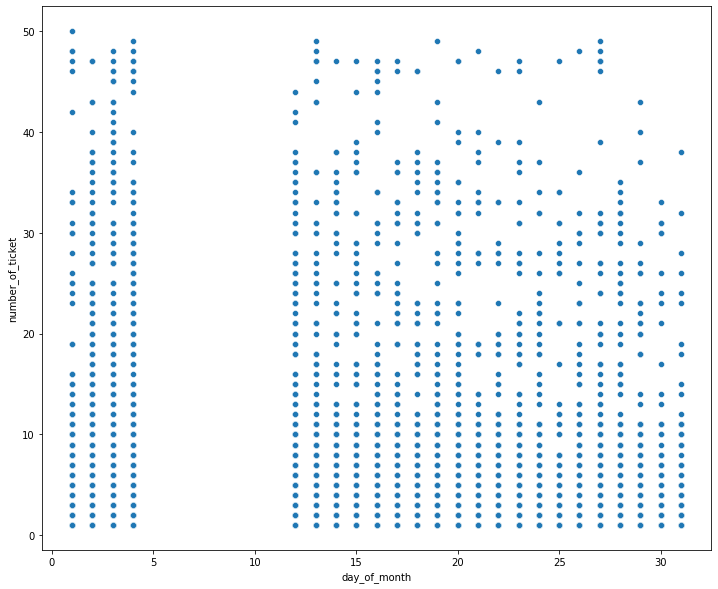

In [140]:
plt.figure(figsize=(12, 10))

sns.scatterplot(x='day_of_month', y="number_of_ticket", data=dataset)

### Summary 
We can see that there is the gap between 5 to 11 in the day of month. We can assume that there is official holiday of public transport between these days.
We can also say that the number of tickets in all the days of month are same.

<Axes: xlabel='hour', ylabel='number_of_ticket'>

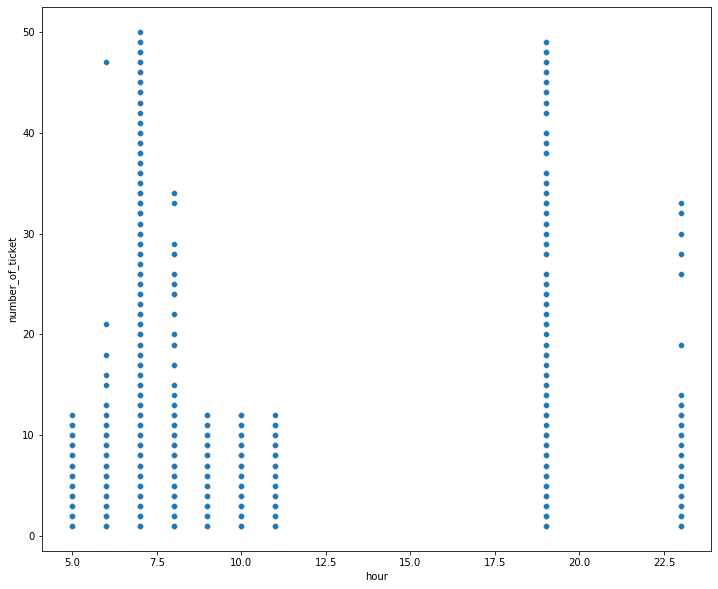

In [141]:
plt.figure(figsize=(12, 10))

sns.scatterplot(x='hour', y="number_of_ticket", data=dataset)

* We can see that most of the tickets were sold at 7 AM & 8AM and that seems true because in the morning most of the people go to work and office.
* From the above we can see that there is no ride between 12PM to 5:30PM. 

In [142]:
dataset_new["travel_time"] = dataset_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

* From the above code we took a column named travel_time from the dataset_new and applied a set of operations to it. Specifically, split each string value in the travel_time column by the ":" separator using the str.split(':') method.
* The resulting output is a list with two elements, the hours and minutes of the travel time. For example, "2:30" would be split into the list ["2", "30"].
* Then, a lambda function is applied to this list using the apply() method. The lambda function takes the first element of the list, which represents the hours, and converts it to an integer using the int() function. It then takes the second element of the list, which represents the minutes, and converts it to an integer as well. It divides the minutes by 60 and adds the result to the hours to get the total travel time in hours.
* Finally, resulting value is assigned to a new column in the dataset_new named travel_time. The new column represents the total travel time in hours.

In [143]:
dataset_new['period'] = np.nan
dataset_new.loc[dataset_new.travel_time < 7, 'period'] = 'em'
dataset_new.loc[(dataset_new.travel_time >= 7) & (dataset_new.travel_time < 12), 'period'] = 'am'
dataset_new.loc[(dataset_new.travel_time >= 12) & (dataset_new.travel_time < 15), 'period'] = 'mid'
dataset_new.loc[(dataset_new.travel_time >= 15) & (dataset_new.travel_time < 19), 'period'] = 'eve'
dataset_new.loc[(dataset_new.travel_time >= 19) & (dataset_new.travel_time <= 24), 'period'] = 'pm'
pcount = dict(dataset_new['period'].value_counts())
pcount

dataset_new['hourly_travelers'] = np.log1p(dataset_new['period'].map(pcount))

dcount = dict(dataset_new["day_of_year"].value_counts())
dataset_new["daily_travelers"] = np.log1p(dataset_new["day_of_year"].map(dcount))
dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.512382,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.512382,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.512382,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.512382,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.512382,3.871201


In [144]:
dataset_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [145]:
new_cols = ['day_of_year', 'daily_travelers', 'minute', 'day_of_month', 'hourly_travelers', 'is_weekend', 'day_of_week']

In [146]:
transport_dataset= dataset_new.copy()

In [147]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.512382,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.512382,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.512382,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.512382,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.512382,3.871201


In [148]:
transport_dataset.shape

(6249, 21)

In [149]:
transport_dataset.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [150]:
dict_cov = {12:1, 2:1, 1:1, 2:1, 4:2, 11:2, 9:3, 7:3, 8:3, 10:3, 6:3, 5:3}
transport_dataset['month'].replace(dict_cov, inplace=True)

* Above code replaces the values of the month column in the transport_dataset based on the key-value pairs in the dict_cov dictionary. The dict_cov dictionary maps the values of the month column to new values. For example, the value 12 is mapped to 1, the value 2 is also mapped to 1.


In [151]:
transport_dataset.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [152]:
transport_dataset.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [153]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_dataset['day_of_month'].replace(conv_dict,inplace=True)

In [154]:
transport_dataset['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [155]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,3,am,8.512382,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,2,am,8.512382,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,2,am,8.512382,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,2,am,8.512382,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,2,am,8.512382,3.871201


In [156]:
# Let us find the difference between next and previous buses And count the travel per minut trip
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  
  return data

* From the above code, The function first sorts the data dataframe by the travel_from and date columns in ascending order. It then calculates the time difference between the next and previous buses for each trip, up to three buses ahead and behind, and saves the results in new columns in the data dataframe.

* Finally, the function fills any missing values in these new columns using the fillna() method. It forwards or backwards fills the missing values based on the method specified by the method parameter (in this case, ffill and backfill, respectively).

In [157]:
data = find_difference_bw_bus(transport_dataset)

In [158]:
data.isnull().sum()

ride_id                           0
travel_date                       0
travel_time                       0
travel_from                       0
car_type                          0
max_capacity                      0
number_of_ticket                  0
date                              0
day_of_week                       0
day_of_year                       0
day_of_month                      0
year_woy                          0
hour                              0
minute                            0
is_weekend                        0
year                              0
quarter                           0
month                             0
period                            0
hourly_travelers                  0
daily_travelers                   0
Time_gap_btw_0_1_next_bus         1
Time_gap_btw_0_1_previous_bus     1
Time_gap_btw_0_2_next_bus         3
Time_gap_btw_0_2_previous_bus     3
Time_gap_btw_0_3_next_bus         3
Time_gap_btw_0_3_previous_bus     3
Time_gap_btw_next_previous_b

We see that there are some null values present in the dataset. so, let us remove those null values

In [159]:
data.dropna(inplace=True)

In [160]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,...,am,8.512382,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,...,am,8.512382,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,...,am,8.512382,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,...,am,8.512382,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,...,am,8.512382,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


In [161]:
from datetime import datetime
from datetime import timedelta

Now let us find distance of each origin point from distination point. We used Nirobi Map to estimate the distance from origin point to destination map.

In [162]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}

data["travel_from_distance"]=data.travel_from.map(distance)

In [163]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)

In [164]:
data["speed"]= data.travel_from_time/data.travel_from_distance

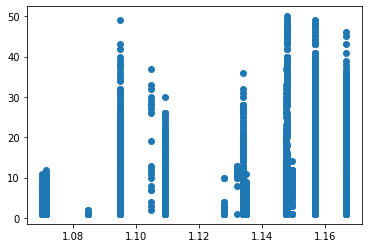

In [165]:
plt.scatter(data['speed'],data['number_of_ticket'])

In [166]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

In [167]:
#find the date of traveling from origin 
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

In [168]:
# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
data["is_rush_hour"]=0
data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

### Encoding Categorical features

In [169]:
#Import LabelEncoder
from sklearn import preprocessing 
data = pd.get_dummies(data, columns=['travel_from', 'day_of_month', 'month'])
label_enc = {'Bus':1, 'shuttle':0}
data.replace(label_enc, inplace=True)

In [170]:
data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,year_woy,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,6654,05-12-17,7.133333,1,49,2,2017-05-12 07:08:00,4,132,201719,...,0,0,0,0,1,0,0,0,0,1
5530,12926,01-04-18,7.133333,1,49,20,2018-01-04 07:08:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5533,12929,01-04-18,7.200000,1,49,2,2018-01-04 07:12:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5539,12935,01-04-18,7.216667,1,49,9,2018-01-04 07:13:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5528,12924,01-04-18,8.000000,1,49,15,2018-01-04 08:00:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0


### Training the models

In [171]:
keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols= ["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket', 'period']

In [172]:
features = data.drop(not_used_cols, axis=1).columns

In [173]:
features

Index(['car_type', 'day_of_week', 'day_of_year', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'hourly_travelers', 'daily_travelers',
       'Time_gap_btw_0_1_next_bus', 'Time_gap_btw_0_1_previous_bus',
       'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_0_2_previous_bus',
       'Time_gap_btw_0_3_next_bus', 'Time_gap_btw_0_3_previous_bus',
       'Time_gap_btw_next_previous_bus', 'travel_from_distance',
       'travel_from_time', 'speed', 'hod_arrived_date', 'minute_arrived_date',
       'is_rush_hour', 'travel_from_Awendo', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'day_of_month_1', 'day_of_month_2',
       'day_of_month_3', 'month_1', 'month_2', 'month_3'],
      dtype='object

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [175]:
data[features].head()

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,1,4,132,7,8,0,2017,2,8.512382,4.025352,...,0,0,0,0,1,0,0,0,0,1
5530,1,3,4,7,8,0,2018,1,8.512382,3.526361,...,0,0,0,0,1,0,0,1,0,0
5533,1,3,4,7,12,0,2018,1,8.512382,3.526361,...,0,0,0,0,1,0,0,1,0,0
5539,1,3,4,7,13,0,2018,1,8.512382,3.526361,...,0,0,0,0,1,0,0,1,0,0
5528,1,3,4,8,0,0,2018,1,8.512382,3.526361,...,0,0,0,0,1,0,0,1,0,0


# Linear Regression

In [176]:
import math

In [177]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

From the below code each feature in the dataset, the code adds the feature to the list of used columns and creates a new dataset called dataset_pr that only contains the used_cols. The train_test_split function is then used to split the data into training and testing sets. A linear regression model is trained using the training data, and the model is used to predict the number of tickets sold in the testing data. The R-squared value and adjusted R-squared value are then calculated to evaluate the performance of the model.

* If the adjusted R-squared value is greater than the previous value, the prev_adjR2 variable is updated with the new value, and the model performance metrics are saved. Otherwise, the most recently added feature is removed from the used_cols list.

* At the end of the loop, the code prints the adjusted R-squared value, the training and testing scores, and the R-squared value for the final model. It also prints the list of important features that were used in the final model.

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  # Predicting 
  y_pred = model.predict(X_test)
  #Find R-squared value
  r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test,y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(r2)
print('Important features are: \n')
used_cols

Adjust_r2: 0.35567284373975505
Train score: 0.42193232412618975
Test score: 0.3628632972060266
0.3629134020782159
Important features are: 



['day_of_year',
 'car_type',
 'hour',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'travel_from_distance',
 'hod_arrived_date',
 'minute_arrived_date',
 'is_rush_hour',
 'travel_from_Homa Bay',
 'travel_from_Keroka',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_3',
 'month_1']

In [179]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 47.816493932966665
RMSE is 6.914947138841097
RMSE is 0.3628632972060266
MAE is 4.715559135853915
MAPE is 164.31772319084828


### Implementing Lasso Regression

In [180]:
from sklearn.linear_model import Lasso

In [181]:
X = data[used_cols].copy()
y = data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
alphas = [0.01, 0.025, 0.5, 0.75, 1]
for alpha in alphas:
  lasso = Lasso(alpha=alpha, max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ', alpha)
  print('test Score: ', lasso.score(X_test, y_test))
  print('train Score: ', lasso.score(X_train, y_train))

alpha:  0.01
test Score:  0.36148599280258054
train Score:  0.4197457311868147
alpha:  0.025
test Score:  0.3589142152029795
train Score:  0.4146433216823071
alpha:  0.5
test Score:  0.25741406289465973
train Score:  0.2724575346862984
alpha:  0.75
test Score:  0.2528049827150224
train Score:  0.26645170307772004
alpha:  1
test Score:  0.2523645079899599
train Score:  0.26568673926522457


In [182]:
lasso = Lasso(alpha= 0.01, max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [183]:
y_test_pred = lasso.predict(X_test)
print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE is 47.91985929767164
RMSE is 6.922417157154836
MAE is 4.722295129640604


# Ridge Regression

In [184]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

From the below code, the dataset is split into training and testing sets, and the hyperparameters for Ridge regression are tuned using GridSearchCV. The hyperparameters that are tuned are the regularization parameter 'alpha'. A range of values for alpha is defined in the 'parameters' dictionary. The GridSearchCV function performs a cross-validation grid search over the range of values of alpha, and the best alpha value is chosen based on the mean squared error score (neg_mean_squared_error). The best model is then trained on the training set with the chosen hyperparameters.

In [185]:
# Hyperparameter tuning
X = data[features].copy()
y = data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring= 'neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [186]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -44.54661701193115


In [187]:
# Model Prediction 
y_pred_ridge = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X_train, y_train))
print(ridge_regressor.score(X_test, y_test))
print_metrics(y_test, y_test_pred)
r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" , r2)
print("Adjusted R2 : ", 1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

-42.61645409902973
-47.90280358550295
MSE is 47.91985929767164
RMSE is 6.922417157154836
RMSE is 0.36148599280258054
MAE is 4.722295129640604
MAPE is 164.63726899419095
R2 : 0.36171325371866103
Adjusted R2 :  0.34778929891629173


# Training Gradient Boosting Regressor

In [188]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  reg = GradientBoostingRegressor(random_state=0)
  reg.fit(X_train, y_train)


  # Predicting 
  y_pred = reg.predict(X_test)
  y_pred_train=reg.predict(X_train)
  

  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2

    
 #Find R-squared value
    r2 = r2_score(y_test, y_pred)
    r2_for_train= r2_score(y_train,y_pred_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test,y_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'r2_Test score: {r2}')
print(f'r2_train score: {r2_for_train}')
print_metrics(y_test, y_pred)
print('Important features are: \n')
used_cols

Adjust_r2: 0.610192717144673
Train score: 0.6749469501408867
Test score: 0.6139754176090624
r2_Test score: 0.6139754176090624
r2_train score: 0.6749469501408867
MSE is 28.979433185753006
RMSE is 5.38325488768208
RMSE is 0.6138600095880478
MAE is 3.528188417327185
MAPE is 112.26087728846794
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'hour',
 'minute',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_distance',
 'minute_arrived_date',
 'travel_from_Awendo',
 'travel_from_Kisii',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Sori']

In [189]:
r2

0.6139754176090624

In [190]:
adj_r2

0.609885039098513

# Training XGboost

In [191]:
import xgboost as xgb
# dataset_pr = data[]
X = data[used_cols].copy()
y = data['number_of_ticket'].copy()


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
adj_r2
r2
r2_train

[10:26:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.8923340921122964
Test score: 0.6613461844868314


0.8923340921122964

In [192]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

# Random Forest Regressor

In [193]:
X = data[features].copy()
y = data['number_of_ticket'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state= 42)


In [194]:
dec_reg = RandomForestRegressor()

In [195]:
dec_reg.fit(X_train, y_train)

RandomForestRegressor()

In [196]:
dec_reg.score(X_train, y_train)

0.9508409660039292

In [197]:
dec_reg.score(X_test, y_test)

0.646527814073488

Model seems to be overfitted

# GridSearchCV on Random forest

The below code defines a dictionary named parameters that contains hyperparameters and their respective values for a decision tree classifier. The hyperparameters are:

* ccp_alpha: complexity parameter used for pruning the decision tree. It sets the minimum impurity decrease required for further splitting a node. The values specified in the list are the values to be tested during hyperparameter tuning.
* max_depth: maximum depth of the decision tree. The values specified in the list are the values to be tested during hyperparameter tuning.
* min_samples_leaf: minimum number of samples required to be at a leaf node. The values specified in the list are the values to be tested during hyperparameter tuning.
* min_samples_split: minimum number of samples required to split an internal node. The values specified in the list are the values to be tested during hyperparameter tuning.

In [198]:
parameters = {'ccp_alpha': [0.01, 0.1, 1, 10, 100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]
              }

In [199]:
X = data[features].copy()
y = data['number_of_ticket'].copy()
dec_reg = RandomForestRegressor()
rf_grid = GridSearchCV(dec_reg, param_grid=parameters, verbose=1, cv=2)
rf_grid.fit(X, y)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=1)

In [200]:
rf_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.1,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [201]:
rf_optimal_model =rf_grid.best_estimator_
rf_train_preds = rf_optimal_model.predict(X_train)
rf_test_preds = rf_optimal_model.predict(X_test)
train_score= rf_optimal_model.score(X_train,y_train)
test_score = rf_optimal_model.score(X_test,y_test)



#Find R-squared value
r2 = r2_score(y_test, rf_test_preds)
r2_train = r2_score(y_train, rf_train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test,rf_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Train Score: ',train_score)
print('Test Score: ',test_score)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, rf_test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, rf_test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, rf_test_preds)))
print('R2 Score: ',r2)
print('R2_train Score: ',r2_train)
print('Adjusted R2 Score: ',adj_r2)


Train Score:  0.6137891941793292
Test Score:  0.6089315622727401
Mean Squared Error (MSE):  29.349308394821843
Mean Absolute Error (MAE):  3.493419342550167
Root Mean Squared Error (MSE):  5.417500197953097
R2 Score:  0.6089315622727401
R2_train Score:  0.6137891941793292
Adjusted R2 Score:  0.6004005700764092


In [202]:
import warnings
warnings.filterwarnings('ignore')

# GridSearchCV on XGboost algorithm

In [203]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

The below code defines a dictionary named "params" containing different hyperparameters for an XGBoost model.

* "min_child_weight" specifies the minimum sum of instance weight (hessian) needed in a child.
* "eta" is the learning rate of the model.
* "colsample_bytree" specifies the subsample ratio of columns when constructing each tree.
* "max_depth" sets the maximum depth of a tree.

In [204]:
params = {"min_child_weight":[10, 20],
          'eta': [0.004, 0.04, 4, 40],
          'colsample_bytree': [0.7],
          'max_depth': [7,9,11],
          }

In [205]:
X = data[features].copy()
y = data['number_of_ticket'].copy()

reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [206]:
reg_gs.best_estimator_.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 20,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.04}

In [207]:
reg_optimal_model = reg_gs.best_estimator_

In [208]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [209]:
reg_optimal_model.score(X_train, y_train)

0.7981128921363103

In [210]:
reg_optimal_model.score(X_test, y_test)

0.797664294886159

Finding R-Squared and Adjusted R-Squared values

In [211]:
r2_test = r2_score(y_test, test_preds)
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [212]:
adj_r2

0.793250427248574

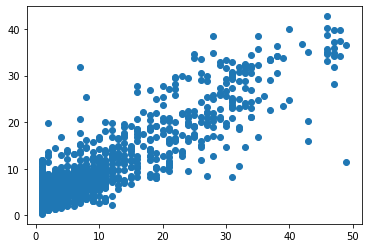

In [213]:
plt.scatter(y_test, test_preds)

In [214]:
importances = reg_optimal_model.feature_importances_

In [215]:
importance_dict = {'feature': list(X_train.columns),
                   'Feature Importance': importances}

In [216]:
importance_df = pd.DataFrame(importance_dict)

In [217]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [218]:
imp_features = important_features['feature'].tolist()

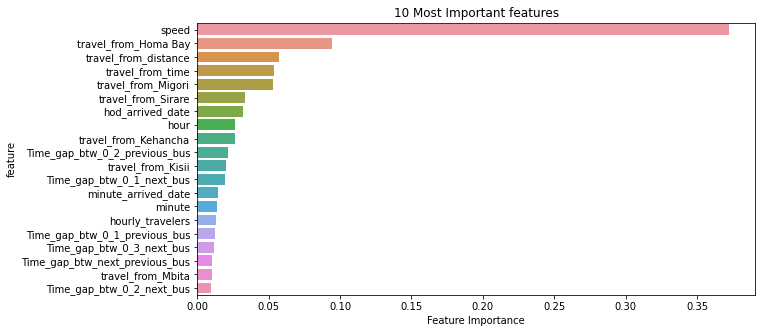

In [219]:
plt.figure(figsize=(10,5))
sns.barplot(y = important_features['feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

# Evaluating the model

In [220]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE) ', np.sqrt(mean_absolute_error(y_test, test_preds)))
print('R2 Score: ', r2_test)
print('Adjusted R2 SCore: ', adj_r2)

Mean Squared Error (MSE):  15.185099168783946
Mean Absolute Error (MAE):  2.506649007462507
Root Mean Squared Error (MSE)  1.583240034695468
R2 Score:  0.797664294886159
Adjusted R2 SCore:  0.793250427248574


In [221]:
# Function to make a dataframe of evaluation matrics for a model


# This function takes arugment as model name and training and testing data and a datafram and returns a dataframe after appending the entries of evaluation matrics for a model

def make_dataFrame(model, df,Model_name,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_train):
  
  df = pd.DataFrame(columns=['Model Name','Train Score','test_score','R2 Score','Adjusted R2 Score','MSE','MAE'])
  model_train_preds = model.predict(X_train)
  model_test_preds = model.predict(X_test)



  train_score = model.score(y_train,model_train_preds)
  test_score = model.score(y_test,model_test_preds)
  r2 = r2_score(y_test,model_trainProb_preds)
  adjusted_r2 = 1-(1-r2_score(y_test, model_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  mse =  mean_squared_error(y_test, model_train_preds)
  mae = mean_absolute_error(y_test, model_train_preds)
  metrix_dict = {'model_name':Model_name,
                 'Train Score':train_score,
                 'Test Score':test_score,
                 'R2 Score':r2, 
                 'Adjusted R2 Score':adjusted_r2,
                 'MSE':mse,
                 'MAE':mae,
               }
  df = df.append(metrix_dict,ignore_index = True)
  return df

In [222]:
# Create a dictionary of instances of all models with model name as values
models = {
    model: "Linear Regression",
    lasso: "Lasso Regression",
    ridge_regressor: "Ridge Regression",
    rf_optimal_model: "Random Forest Regressor"
}


# Conclusion

We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso), GBM,Random Forest Regressor, XGboost regresssor. and Also we tuned the parameters of Random forest regressor and XGboost regressor and also found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.